In [ ]:
import os

#### path
print("\n\n path ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ\n")
root_dir = ".."

pdf_text_path = os.path.join(root_dir, "data", "sample_text.pdf")
pdf_image_path_01 = os.path.join(root_dir, "data", "soil_suitability", "sample_image_01.pdf")
pdf_image_path_05 = os.path.join(root_dir, "data", "soil_suitability", "sample_image_05.pdf")
pdf_image_path = os.path.join(root_dir, "data", "soil_suitability", "soil_suitability.pdf")

output_pdf_path = os.path.join(root_dir, "data", "output.PDF")
output_txt_path = os.path.join(root_dir, "data", "ocr_text.txt")
output_json_path = os.path.join(root_dir, "data", "ocr_text.json")


print("pwd :", os.getcwd())
print("pdf_image_path :", pdf_image_path)



 path ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

pwd : z:\maeng_dir\sparta_camp\final_sparta\ipython
pdf_image_path_01 : ..\data\sample_image_01.pdf
book_DB_dir : ..\book_DB


## OCR - pdf to text
https://sooeun67.github.io/data%20science/ocr-comparison/

In [ ]:
from langchain_community.document_loaders import CSVLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

#### Data Load & Split
print("\n\n Data Load & Split ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ\n")
whole_data = CSVLoader(file_path="./data/test.csv", encoding='utf-8').load()
splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap = 200)
split_data = splitter.split_documents(whole_data)

print(type(split_data[0]))
print(split_data[0])

In [4]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders.parsers import RapidOCRBlobParser

#### Data Load & Split
print("\n\n Data Load & Split ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ\n")
# page_list = PyPDFLoader(file_path = pdf_image_path_01,).load()
# page_list = PyPDFLoader(file_path = pdf_image_path_01, mode="page").load()
# page_list = PyPDFLoader(file_path = pdf_image_path_01, extract_images=True).load()

page_list = PyPDFLoader(
            file_path = pdf_image_path_01,
            mode="page",
            images_inner_format="markdown-img",
            images_parser=RapidOCRBlobParser(),
            ).load()

print(page_list[0])
# print(page_list[0])
# print(page_list[1])
# print(page_list[1].page_content[:300])
# print(page_list[2])
# print(page_list[2].page_content[:300])



 Data Load & Split ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ



TypeError: Cannot handle this data type: (1, 1, 1), |u1

## tesseract

In [5]:
import pdfplumber
import pytesseract

# pytesseract.pytesseract.tesseract_cmd = r"C:\Users\USER\AppData\Local\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

#### OCR
with pdfplumber.open(pdf_image_path) as pdf:
    for i, page in enumerate(pdf.pages):
        page_image = page.to_image()
        full_page_image = page_image.original.convert("RGB") # PIL 이미지로 변환

        ocr_text = pytesseract.image_to_string(full_page_image, lang="kor+eng")
        
        print(f" page {i} ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ")
        print(ocr_text)
        
        if i == 5:
            break
        
        # page_list[i] = Document(page_content=ocr_text, metadata=metadata)
        


 page 0 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
AA

melonggena 7.

생육에 따른 기상득성(0)

sores                   a

직물 재배에 FLAP 화혁싱

re |   소젠        —
ais | BES] 거소    !      Me | PS
ase                     Erle                      ure
Tian Dai Pan


 page 1 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
생육에 따른 기상두성(0)
Ed          1    [    STG

To 515. 1

Amel 알맞은 도양 ada 득성 및 Sela)

1        ae        두실 | ae Foo
z       100

직물 Add 알맛은 Ve Bad

ml         Feccations

ow |        1s Shel Becirs wt

a                    My

ele         더                   마의

ma | ena          Wea | 1815

=~

 page 2 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
생육에 따는 기상두

Toe

Zee

Ae 제배에 알맞은 노

기명    경사!

두신

당일 ae

ee eo

재매에 알맞은 도양 sa) 4)
re            nella            Feccations
은                           clea
ase | OS                      Me
lint                        wa
= am                  0907

Jatt FARR 가기

asl

goo}, ola)

 page 3 ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
=

생육에 따른 기상두성(

a

TEE

Saale       a

가을 제때에 TSP ey 형데식 득싱 및 을리성
7        ae           za       fata
Ee       ;     aaa

가을 제

## pypdfium2

In [10]:
#pip install pypdfium2
import pypdfium2 as pdfium


pdf = pdfium.PdfDocument(pdf_image_path_01)

version = pdf.get_version()  # get the PDF standard version
n_pages = len(pdf)  # get the number of pages in the document

for i in range(len(pdf)):
    page = pdf[i]  
    text = page.get_textpage().get_text_range()
    # text = page.get_textpage().get_text_bounded()
    
    print("text :", text)
    # break
    # extracted_text.append(text)

# "\n".join(extracted_text)


text : 


## Ghostscript - pdf to pdf (with text)
https://ghostscript.com/blog/ocr.html

In [48]:
import subprocess
gs_path = r"C:\Program Files\gs\gs10.04.0\bin\gswin64c.exe"
os.environ["TESSDATA_PREFIX"] = r"C:\Program Files\Tesseract-OCR\tessdata"

def ocr_with_ghostscript(input_pdf, output_pdf, lang="kor"):
    gs_command = [
        gs_path,
        # "gs",
        "-dNOPAUSE",
        "-dBATCH",
        "-sDEVICE=ocr",
        f"-sOCRLanguage={lang}",  # 한글 OCR 설정
        "-r300",
        f"-sOutputFile={output_pdf}",
        input_pdf
    ]
    
    result = subprocess.run(gs_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    
    if result.returncode == 0:
        print(f"OCR 적용 완료: {output_pdf}")
    else:
        print(f"오류 발생: {result.stderr.decode()}")


ocr_with_ghostscript(pdf_image_path, output_pdf_path)

OCR 적용 완료: ..\data\output.PDF


## aspose
https://docs.aspose.com/

In [11]:
# 이 코드 예제는 Python에서 스캔한 PDF 문서에서 텍스트를 인식하고 추출하는 방법을 보여줍니다.
import aspose.ocr as ocr

# OCR 엔진 초기화
api = ocr.AsposeOcr()

# 인식 설정 초기화
settings = ocr.RecognitionSettings()
settings.auto_denoising = True
settings.auto_contrast = True

# 인식 배치에 파일 추가
files = ocr.OcrInput(ocr.InputType.PDF)

# 스캔한 PDF에 액세스하여 페이지 번호와 총 페이지 수를 설정하세요.
files.add(pdf_image_path_01, 0, 1)

# 텍스트를 인식
result = api.recognize(files , settings)

# 인식 결과 인쇄
print(result[0].recognition_text)

AttributeError: 'aspose.ocr.RecognitionSettings' object has no attribute 'auto_denoising'

## pdf to image pdf2imag

In [ ]:
# pip install pdf2image
import pdf2image
from pdf2image import convert_from_path
poppler_path = r"Z:\maeng_dir\sparta_camp\final_sparta\lib\poppler-24.08.0\Library\bin"


pages = convert_from_path(pdf_image_path, poppler_path=poppler_path)

for count, page in enumerate(pages):
    print(count)
    # break
    # page.save(f'out{count}.jpg', 'JPEG')

0
1


## pytesseract (with image)

In [ ]:
import pytesseract
from pdf2image import convert_from_path
import json

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
poppler_path = r"Z:\maeng_dir\sparta_camp\final_sparta\lib\poppler-24.08.0\Library\bin"


images = convert_from_path(
                            pdf_image_path_01,
                            dpi = 300,
                            poppler_path=poppler_path,
                        )

f = open("./ocr_text.txt", "w")

for i, image in enumerate(images):
    ocr_text = pytesseract.image_to_string(image, lang="kor+eng")
    f.write(f"page {i}")
    f.write(ocr_text)
    
f.close()   

### 카멜롯, 네이버 클로바? (100회 이상 유료)
정확도 상, 1장 씩 나눠야함 불편함







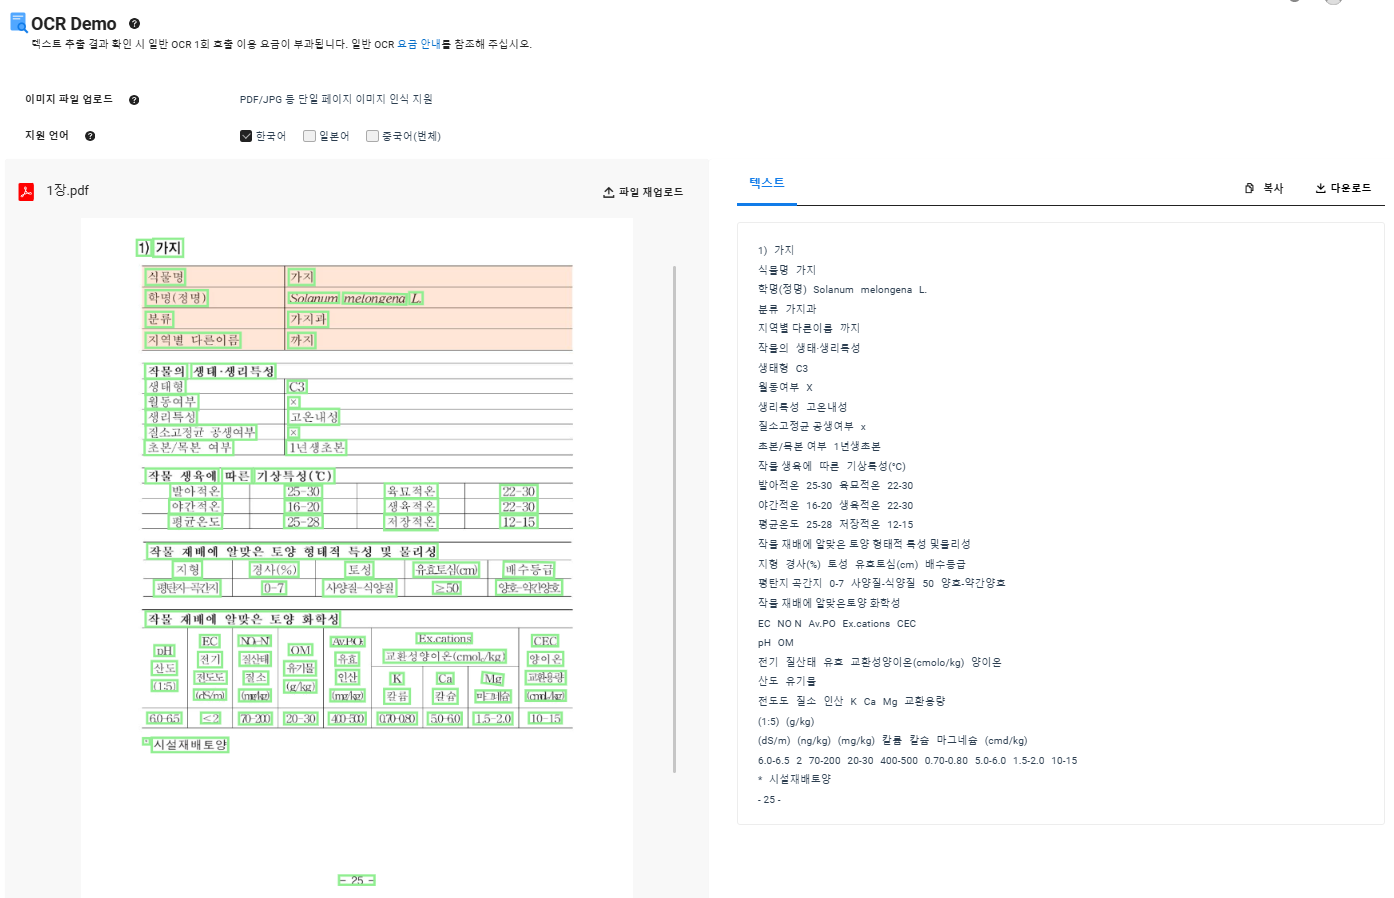